In [1]:
!pip install matplotlib

In [2]:
!pip install wordcloud

  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-win_amd64.whl size=152050 sha256=6ea38bf49f8fbcc51faefc5012d8a64088960db231e3e39eeefa122b7159ceb5
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud


In [3]:
import nltk

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from ntlk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

ModuleNotFoundError: No module named 'ntlk'

In [7]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [8]:
all_files = glob.glob('myCabinetExcelData*.xls')

In [9]:
all_files

['myCabinetExcelData (1).xls',
 'myCabinetExcelData (2).xls',
 'myCabinetExcelData (3).xls',
 'myCabinetExcelData (4).xls',
 'myCabinetExcelData (5).xls',
 'myCabinetExcelData (6).xls',
 'myCabinetExcelData (7).xls',
 'myCabinetExcelData (8).xls',
 'myCabinetExcelData (9).xls',
 'myCabinetExcelData.xls']

In [10]:
all_files_data = []

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Online Analytical Processing for Business Inte...,"Patel, Jigna Ashish; Sharma, Priyanka",Mary Ann Leibert,2020
1,NaN,2,Call for Special Issue Papers: Big Data Analyt...,"Balamurugan, S.; Muthu, Bala Anand; Peng, Shen...",Mary Ann Leibert,2020
2,NaN,3,Call for Special Issue Papers: Big Data in Bus...,"Nobanee, Haitham",Mary Ann Leibert,2019
3,NaN,4,Can Big Data Machines Analyze Stock Market Sen...,unknown,Mary Ann Leibert,2014
4,NaN,5,Big Data for Social Good,unknown,Mary Ann Leibert,2015
...,...,...,...,...,...,...
95,NaN,96,GSio: A programmatic interface for delivering ...,"Larraondo, Pablo R.; Pringle, Sean; Guo, Jian;...",John Wiley & Sons Ltd,2017
96,NaN,97,Innovative approaches to the Sustainable Devel...,"Guo, Huadong; Liang, Dong; Chen, Fang; Shirazi...",John Wiley & Sons Ltd,2021
97,NaN,98,Analytics of big geosocial media and crowdsour...,"Li, Songnian; Wachowicz, Monica; Fan, Hongchao",John Wiley & Sons Ltd,2021
98,NaN,99,The role of big Earth data in understanding cl...,"Jia, Gensuo",John Wiley & Sons Ltd,2020


In [11]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Online Analytical Processing for Business Inte...,"Patel, Jigna Ashish; Sharma, Priyanka",Mary Ann Leibert,2020
1,NaN,2,Call for Special Issue Papers: Big Data Analyt...,"Balamurugan, S.; Muthu, Bala Anand; Peng, Shen...",Mary Ann Leibert,2020
2,NaN,3,Call for Special Issue Papers: Big Data in Bus...,"Nobanee, Haitham",Mary Ann Leibert,2019
3,NaN,4,Can Big Data Machines Analyze Stock Market Sen...,unknown,Mary Ann Leibert,2014
4,NaN,5,Big Data for Social Good,unknown,Mary Ann Leibert,2015
...,...,...,...,...,...,...
995,NaN,96,A Message from the Editor-in-Chief of Big Data,unknown,Mary Ann Leibert,2017
996,NaN,97,Big data and analytics: a data management pers...,"Mittal, Prabhat",Inderscience,2020
997,NaN,98,"Deep Learning on Big, Sparse, Behavioral Data","De Cnudde, Sofie; Ramon, Yanou; Martens, David...",Mary Ann Leibert,2019
998,NaN,99,Toward Business Process Innovation in the Big ...,"Saide, Saide; Sheng, Margaret L.",Mary Ann Leibert,2020


In [12]:
all_files_data_concat.to_csv('riss_bigdata.csv', encoding='utf-8', index=False)

In [13]:
all_title = all_files_data_concat['제목']
all_title

0      Online Analytical Processing for Business Inte...
1      Call for Special Issue Papers: Big Data Analyt...
2      Call for Special Issue Papers: Big Data in Bus...
3      Can Big Data Machines Analyze Stock Market Sen...
4                               Big Data for Social Good
                             ...                        
995       A Message from the Editor-in-Chief of Big Data
996    Big data and analytics: a data management pers...
997        Deep Learning on Big, Sparse, Behavioral Data
998    Toward Business Process Innovation in the Big ...
999    Overcoming Resistance to Big Data and Operatio...
Name: 제목, Length: 1000, dtype: object

In [14]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [15]:
words = []

for title in all_title : 
    EnWords = re.sub(r"[^a-zA-Z]+"," ",str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [16]:
print(words)

[['online', 'analytical', 'processing', 'business', 'intelligence', 'big', 'data'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'agricultural', 'disaster', 'management'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'business'], ['big', 'data', 'machine', 'analyze', 'stock', 'market', 'sentiment'], ['big', 'data', 'social', 'good'], ['call', 'special', 'issue', 'paper', 'multimedia', 'big', 'data', 'analytics', 'engineering', 'education'], ['big', 'data', 'analysis', 'swimming', 'pool', 'impact', 'household', 'electric', 'intensity', 'san', 'antonio', 'texas'], ['stgi', 'spatio', 'temporal', 'grid', 'index', 'model', 'marine', 'big', 'data'], ['big', 'data', 'healthcare', 'opportunity', 'challenge'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'intelligent', 'system', 'cybersecurity'], ['big', 'data', 'predictive', 'analytics', 'health', 'care'], ['comparison', 'scalability', 'batch', 'big', 'data', 'processing', 'apache', 'spark', 'a

In [17]:
words2 = list(reduce(lambda x,y : x+y, words))
print(words2)

['online', 'analytical', 'processing', 'business', 'intelligence', 'big', 'data', 'call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'agricultural', 'disaster', 'management', 'call', 'special', 'issue', 'paper', 'big', 'data', 'business', 'big', 'data', 'machine', 'analyze', 'stock', 'market', 'sentiment', 'big', 'data', 'social', 'good', 'call', 'special', 'issue', 'paper', 'multimedia', 'big', 'data', 'analytics', 'engineering', 'education', 'big', 'data', 'analysis', 'swimming', 'pool', 'impact', 'household', 'electric', 'intensity', 'san', 'antonio', 'texas', 'stgi', 'spatio', 'temporal', 'grid', 'index', 'model', 'marine', 'big', 'data', 'big', 'data', 'healthcare', 'opportunity', 'challenge', 'call', 'special', 'issue', 'paper', 'big', 'data', 'analytics', 'intelligent', 'system', 'cybersecurity', 'big', 'data', 'predictive', 'analytics', 'health', 'care', 'comparison', 'scalability', 'batch', 'big', 'data', 'processing', 'apache', 'spark', 'apache', 'flink', 'ensem

In [19]:
count = Counter(words2)
count

Counter({'online': 15,
         'analytical': 2,
         'processing': 25,
         'business': 24,
         'intelligence': 20,
         'big': 1117,
         'data': 1241,
         'call': 31,
         'special': 36,
         'issue': 48,
         'paper': 29,
         'analytics': 107,
         'agricultural': 4,
         'disaster': 6,
         'management': 33,
         'machine': 24,
         'analyze': 2,
         'stock': 4,
         'market': 9,
         'sentiment': 4,
         'social': 17,
         'good': 6,
         'multimedia': 5,
         'engineering': 12,
         'education': 9,
         'analysis': 86,
         'swimming': 1,
         'pool': 1,
         'impact': 16,
         'household': 1,
         'electric': 4,
         'intensity': 8,
         'san': 1,
         'antonio': 1,
         'texas': 1,
         'stgi': 1,
         'spatio': 2,
         'temporal': 3,
         'grid': 6,
         'index': 6,
         'model': 47,
         'marine': 1,
         'hea

In [20]:
word_count = dict()

In [21]:
for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1241
big : 1117
analytics : 107
based : 99
analysis : 86
driven : 68
using : 61
system : 55
approach : 53
issue : 48
model : 47
challenge : 46
learning : 46
application : 42
new : 39
special : 36
science : 35
health : 34
framework : 34
management : 33
platform : 33
research : 32
call : 31
era : 31
paper : 29
cloud : 29
opportunity : 28
smart : 28
algorithm : 27
network : 26
technology : 26
processing : 25
business : 24
machine : 24
perspective : 24
earth : 24
process : 24
computing : 23
review : 23
use : 23
optimization : 23
information : 22
mining : 22
service : 21
performance : 21
intelligence : 20
method : 20
real : 20
time : 20
development : 20


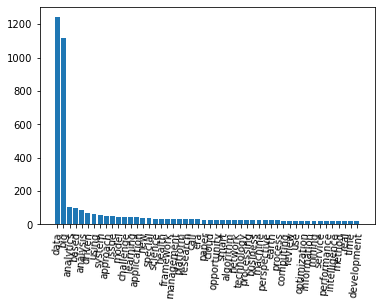

In [22]:
sorted_keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')

plt.xticks(range(len(word_count)), list(sorted_keys), rotation='85')
plt.show()

In [23]:
all_files_data_concat['doc_count'] =  0
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1995,1
1,2003,1
2,2004,1
3,2006,1
4,2009,1
5,2011,5
6,2012,19
7,2013,53
8,2014,133
9,2015,106


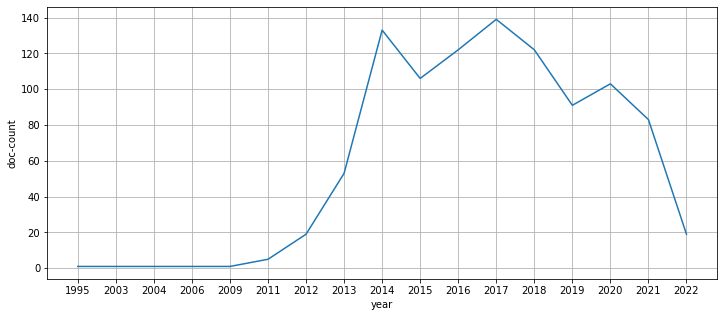

In [24]:
plt.figure(figsize = (12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

In [25]:
stopwords = set(STOPWORDS)
ws = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

NameError: name 'wc' is not defined

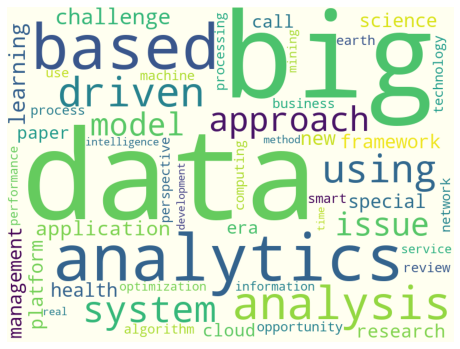

In [26]:
stopwords = set(STOPWORDS)
ws = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = ws.generate_from_frequencies(word_count)

plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [27]:
cloud.to_file("riss_bigdata_wordCloud.jpg")